In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Task A (1.1)
#Read the Training and Testing data

In [0]:
# Task A (1.1)
#Read the Training and Testing data
Train = pd.read_csv('train_wbcd.csv', delimiter=',')
Test = pd.read_csv('test_wbcd.csv', delimiter=',')
print("Test shape: {}".format(Test.shape))
print("Train shape: {}".format(Train.shape))

print("The number of features in Training Data: {}".format(Train.shape[1]-2))
print("The number of features in Testing Data: {}".format(Test.shape[1]-2))
#Train data has 100 rows and 32 columns
#Test data has 20 rows and 32 columns

Test shape: (20, 32)
Train shape: (100, 32)
The number of features in Training Data: 30
The number of features in Testing Data: 30


# Total Number of 0 and 1 in train and test data

In [0]:
#Total number of 0 and 1 for label train data
Train=Train.replace('B',0)
Train=Train.replace('M',1)
Train['Diagnosis'].value_counts()
#Replacing B as 0 and M as 1

0    58
1    42
Name: Diagnosis, dtype: int64

(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 42.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

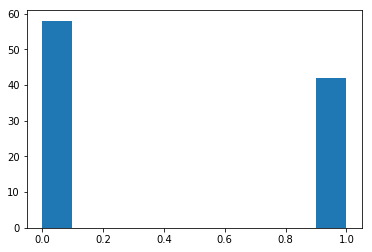

In [0]:
plt.hist(Train['Diagnosis'])
#The Training data is balanced. There's not much difference between 0 and 1.

In [0]:
#Total number of 0 and 1 for label test data
Test=Test.replace('B',0)
Test=Test.replace('M',1)
Test['Diagnosis'].value_counts()
#Replacing B as 0 and M as 1

0    14
1     6
Name: Diagnosis, dtype: int64

(array([14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

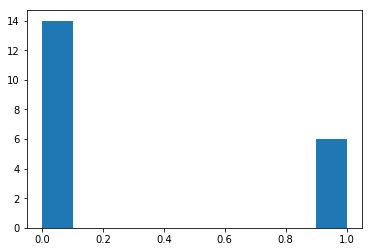

In [0]:
plt.hist(Test['Diagnosis'])
#The data is highly unbalanced between 0 and 1. 1 seems much low in comparison to 0. So, the data is not balanced.

# Finding the missing values

In [0]:
#Missing value columns for Train Data
Missing_value_count_by_column_Train=Train.isnull().sum()
print(Missing_value_count_by_column_Train[Missing_value_count_by_column_Train >0])
# In f21 column of training data there is two missing value.

f21    2
dtype: int64


In [0]:
#Missing value Columns for Test Data
Missing_value_count_by_column_Test=Test.isnull().sum()
print(Missing_value_count_by_column_Test[Missing_value_count_by_column_Test >0])
#In f21 column of testing data there is one missing value.

f21    1
dtype: int64


In [0]:
#Replace Missing values with median
meadian_value_Train=Train['f21'].median()
Train['f21']=Train['f21'].fillna(meadian_value_Train)

meadian_value_Test=Test['f21'].median()
Test['f21']=Test['f21'].fillna(meadian_value_Test)
#For training and testing data the value is replaced using the median

In [0]:
#Normalization with maximum-minimum/(maximum-minimum)

Norm_Train = Train.iloc[:,2:]
Train.iloc[:,2:] = (Norm_Train - Norm_Train.min()) / (Norm_Train.max() - Norm_Train.min())

Norm_Test = Test.iloc[:,2:]
Test.iloc[:,2:] = (Norm_Test - Norm_Test.min()) / (Norm_Test.max() - Norm_Test.min())

# 1.2 Logistic Regression Train Logistic regression models

In [0]:
#Logistic regression using Lambda as 0.1
Dtrain =Train
Dtest = Test
predictors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
response = ['Diagnosis']


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr_with_lambda = LogisticRegression(C=1/lambda_val, penalty='l2')
lr_with_lambda.fit(Dtrain[predictors], Dtrain['Diagnosis'])
y_predict_with_lambda = lr_with_lambda.predict(Dtest[predictors])

#Evaluate our model
model_acc_with_lambda = accuracy_score(y_predict_with_lambda, Dtest['Diagnosis'])
model_precision_with_lambda= precision_score(y_predict_with_lambda, Dtest['Diagnosis'])
model_F1_score_with_lambda= f1_score(y_predict_with_lambda, Dtest['Diagnosis'])
model_confusion_matrix_with_lambda= confusion_matrix(y_predict_with_lambda, Dtest['Diagnosis'])
print("Model Accuracy with lambda is: {}".format(model_acc))
print("Model Precision with lambda is:{}".format(model_precision))
print("Model F1_score with lambda is:{}".format(model_F1_score))
print("Model confusion_matrix with lambda is:\n{}".format(model_confusion_matrix))

#The accuracy seems better but in terms of precision it's not good. Its prediciting more false positive
# In the accuracy matrix false positive seems high
#The F1 score is the weighted average of accuracy and precision. So,it shows slightly better result.

Model Accuracy with lambda is: 0.95
Model Precision with lambda is:0.3333333333333333
Model F1_score with lambda is:0.5
Model confusion_matrix with lambda is:
[[14  4]
 [ 0  2]]


In [0]:
#Logistic regression using alpha 0.1
Dtrain =Train
Dtest = Test
predictors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
response = ['Diagnosis']
alpha_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr_with_alpha = LogisticRegression(C=1/alpha_val, penalty='l1')
lr_with_alpha.fit(Dtrain[predictors], Dtrain['Diagnosis'])
y_predict_with_alpha = lr_with_alpha.predict(Dtest[predictors])

#Evaluate our model
model_acc_with_alpha = accuracy_score(y_predict_with_alpha, Dtest['Diagnosis'])
model_precision_with_alpha= precision_score(y_predict_with_alpha, Dtest['Diagnosis'])
model_F1_score_with_alpha= f1_score(y_predict_with_alpha, Dtest['Diagnosis'])
model_confusion_matrix_with_alpha= confusion_matrix(y_predict_with_alpha, Dtest['Diagnosis'])
print("Model Accuracy with alpha: {}".format(model_acc))
print("Model Precision with alpha:{}".format(model_precision))
print("Model F1_score with aplpha:{}".format(model_F1_score))
print("Model confusion_matrix with alpha:\n{}".format(model_confusion_matrix))
#The accuracy seems better but precision score is not good.
# In the accuracy matrix false positive seems high
#The F1 score is the weighted average of accuracy and precision. So,it shows slightly better result.

Model Accuracy with alpha: 0.95
Model Precision with alpha:0.3333333333333333
Model F1_score with aplpha:0.5
Model confusion_matrix with alpha:
[[14  4]
 [ 0  2]]


In [0]:
#Logistc regression using alpha 0.1 and lambda 0.1
Dtrain =Train
Dtest = Test
predictors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
response = ['Diagnosis']
alpha_val = 0.1
enet_B = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.5, max_iter=1000) 
enet_B.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict_B = enet_B.predict(Dtest[predictors])
enet_acc = accuracy_score(y_predict_B, Dtest[response])
model_precision= precision_score(y_predict_B, Dtest['Diagnosis'])
model_F1_score= f1_score(y_predict_B, Dtest['Diagnosis'])
model_confusion_matrix= confusion_matrix(y_predict_B, Dtest['Diagnosis'])
print("Model accuracy with alpha 0.1 and lambda 0.1: {}".format(enet_acc))
print("Model Precision with alpha 0.1 and lambda 0.1:{}".format(model_precision))
print("Model F1_score with alpha 0.1 and lambda 0.1:{}".format(model_F1_score))
print("Model confusion_matrix with alpha 0.1 and lambda 0.1:\n{}".format(model_confusion_matrix))
#when we use alpha and lambda together the precision provides better result from before that's why the F1 score is also increased 
#But from the confusion matrix it seems that it's providing more false positive that's why accuracy score came down

Model accuracy with alpha 0.1 and lambda 0.1: 0.85
Model Precision with alpha 0.1 and lambda 0.1:0.5
Model F1_score with alpha 0.1 and lambda 0.1:0.6666666666666666
Model confusion_matrix with alpha 0.1 and lambda 0.1:
[[14  3]
 [ 0  3]]


# 1.3 Choosing the best hyper-parameter

In [0]:
#Choosing the best hyper parameter
Dtrain =Train
Dtest = Test
predictors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
response = ['Diagnosis']
from sklearn.model_selection import train_test_split
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,3])
   
   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += accuracy_score(y_predict, Dtest[label])
          
   model_acc /= trials


   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [0]:
#Best Lambda
lambda_vals = [.01,.03,.1,.3,1,3,10,33,.001,.003,]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(100,Train, predictors, 'Diagnosis', 'l2', np.float(l))
   index += 1


print("Acc: {}".format(l2_acc))

# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
 
best_lambda = lambda_vals[max_index_l2]

print("Best Lambda: {}".format(best_lambda))
#the best lambda is 0.001,o .03 and .01 as all provides the best accuracy result

Acc: [0.98 0.98 0.98 0.96 0.95 0.93 0.91 0.85 0.99 0.98]
Best Lambda: 0.001


In [0]:
#Best Alpha
alpha_vals = [0.1,1,3,10,33,100,333,1000,3333,10000,33333]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(100,Train, predictors, 'Diagnosis', 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))
#The best alpha value is 0.1 as it provides the best accuracy result

Acc: [0.96 0.94 0.91 0.91 0.89 0.89 0.89 0.43 0.41 0.45 0.58]
Best Alpha: 0.1


In [0]:
#Logistc regression using alpha 0.1 and lambda 0.1
from sklearn.linear_model import SGDClassifier 
Dtrain =Train
Dtest = Test
predictors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
response = ['Diagnosis']


alpha_val = 0.1

enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val, l1_ratio=.50, max_iter=1000) 
enet.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict = enet.predict(Dtest[predictors])
enet_acc = accuracy_score(y_predict, Dtest[response])
model_precision= precision_score(y_predict, Dtest['Diagnosis'])
model_confusion_matrix= confusion_matrix(y_predict, Dtest['Diagnosis'])
print("Acc: {}".format(enet_acc))
print("Model Precision is:{}".format(model_precision))
print("Model confusion_matrix is:{}".format(model_confusion_matrix))

#top five feature selection in decreasing order

feature_weights_lambda=enet.coef_[0]
Weight_matrix_lambda = pd.DataFrame()
Weight_matrix_lambda['Feature'] = pd.Series(predictors)
Weight_matrix_lambda['Weights'] = pd.Series(feature_weights_lambda,name= "Weights")
Weight_matrix_lambda['Abs Weights'] = abs(Weight_matrix_lambda['Weights'])
a = np.sort(Weight_matrix_lambda['Abs Weights'])[::-1]
print("Top five features are:{}".format(a[:5]))
# alpha value and lambda value are used as 0.5. the accuracy is 85% as it provides some false positive result 
#The precision is also not good.
#It seems a overfitting model as the accuracy level comes down from before.

Acc: 0.85
Model Precision is:0.5
Model confusion_matrix is:[[14  3]
 [ 0  3]]
Top five features are:[0.50081288 0.31740226 0.31321656 0.23262087 0.20295856]


# TASK B 2.1-1

In [0]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
minist = pd.read_csv('reduced_mnist.csv', delimiter=',')

print("The number of features for Minist are: {}".format(minist.shape[1]-1))



#print the unique labels in y
y=minist['label']
print ("unique labels: {}".format(np.unique(y)))

#the number of rows
Count_Row=minist.shape[0]
print("the number of rows are: {}".format(Count_Row))

The number of features for Minist are: 784
unique labels: [0 1 2 3 4 5 6 7 8 9]
the number of rows are: 2520


# TASK B 2.1-2

In [0]:

Label=minist['label']
Pexil=minist.loc[:,'pixel0':'pixel783']

#split
xtrain, xtest, ytrain, ytest = train_test_split(Pexil, Label, test_size=0.3)


In [0]:
from sklearn.linear_model import SGDClassifier 
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import SGDClassifier 

alpha_val = 1

OVR = OneVsRestClassifier(LogisticRegression(penalty='l1',C = 1/alpha_val, random_state=2018))
OVR.fit(xtrain,ytrain)

Pred_OVR = OVR.predict(xtest)

OVR_accuracy=accuracy_score(ytest,Pred_OVR)
OVR_precision=precision_score(ytest,Pred_OVR,average='weighted')
OVR_recall=recall_score(ytest,Pred_OVR,average='weighted')

print("OVR Accuracy is: {}".format(OVR_accuracy))
print("OVR Precision is: {}".format(OVR_precision))
print("OVR Recall is: {}".format(OVR_recall))
#The accuracy, precision and recall seems a good result. they are all above 85%

OVR Accuracy is: 0.8558201058201058
OVR Precision is: 0.8592739760591119
OVR Recall is: 0.8558201058201058


# 2.2 Choosing the best hyper-parameters

In [0]:

from sklearn.model_selection import train_test_split

minist_train, minist_test= train_test_split(minist, test_size=0.3)
minist_test_y=minist_test['label']
minist_test_x=minist_test.loc[:,'pixel0':'pixel783']
minist_train_y=minist_train['label']
minist_train_x=minist_train.loc[:,'pixel0':'pixel783']

In [0]:
#Choosing the best hyper parameter

from sklearn.model_selection import train_test_split
def runOVRmodel(trials, train_data, penalty_type, penalty_score):

   train_acc     = 0
   val_acc       = 0
   for i in range(0,trials):
      Dtrain, Dtest,= train_test_split(train_data, test_size=0.3)
      OVR = OneVsRestClassifier(LogisticRegression(C = 1/penalty_score,penalty=penalty_type,))
      OVR.fit(Dtrain.iloc[:,1:785],Dtrain.iloc[:,0:1])
      Pred_OVR_test = OVR.predict(minist_test_x)
      Pred_OVR_train = OVR.predict(minist_train_x)
      val_acc += accuracy_score(Pred_OVR_test, minist_test_y)
      train_acc += accuracy_score(Pred_OVR_train, minist_train_y)
   val_acc /= trials       
   train_acc /= trials


   return np.round(model_acc, decimals=2), np.round(val_acc,decimals=2)

Train_Acc: [0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]
Validation_Acc: [0.84 0.84 0.84 0.84 0.84 0.85 0.86 0.84 0.79 0.67 0.54]
Best Alpha: 333


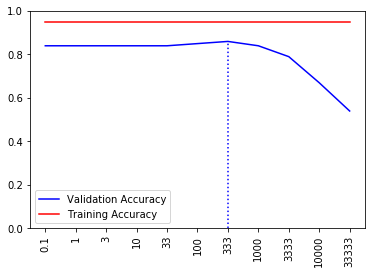

In [0]:
#Best Alpha
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]

Train_acc=np.zeros(len(alpha_vals))
val_acc= np.zeros(len(alpha_vals))
index = 0
#L1 regularization
for l in alpha_vals:
    Train_acc[index],val_acc[index]   = runOVRmodel(10,train_data=minist_train,penalty_type='l1', penalty_score=np.float(l))
    index += 1

print("Train_Acc: {}".format(Train_acc))
print("Validation_Acc: {}".format(val_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(val_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))


#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), val_acc, color='b', 
         label='Validation Accuracy')
plt.plot(range(0,len(alpha_vals)), Train_acc, color='r', 
         label='Training Accuracy')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')

#Highlight the best values of alpha
plt.plot((max_index_l1, max_index_l1), (0, val_acc[max_index_l1]), 
         ls='dotted', color='b')


#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()
# With the training set it provides the same accuracy but with the validation set the accurcary seems to go down with alpha change
#So according to validation accuracy the best alpha is 333 which provides the accuracy of 86%

In [0]:
#The final Model
minist = pd.read_csv('reduced_mnist.csv', delimiter=',')
Label=minist['label']
Pexil=minist.loc[:,'pixel0':'pixel783']

#split
xtrain, xtest, ytrain, ytest = train_test_split(Pexil, Label, test_size=0.3)

alpha_val = 333

OVR = OneVsRestClassifier(LogisticRegression(penalty='l1',C = 1/alpha_val, random_state=2018))
OVR.fit(xtrain,ytrain)

Predd_OVR = OVR.predict(xtest)

OVR_accuracy=accuracy_score(ytest,Predd_OVR)
OVR_precision=precision_score(ytest,Predd_OVR,average='weighted')
OVR_recall=recall_score(ytest,Predd_OVR,average='weighted')
OVR_Confusion_matrix= confusion_matrix(ytest,Predd_OVR)

print("OVR Accuracy is: {}".format(OVR_accuracy))
print("OVR Precision is: {}".format(OVR_precision))
print("OVR Recall is: {}".format(OVR_recall))
print("OVR Confusion Matrix is:\n{}".format(OVR_Confusion_matrix))

#The accuracy seems 88% and precision is also 88% it seems the model is a good fit, The model is not underfitting or overfitting

OVR Accuracy is: 0.8875661375661376
OVR Precision is: 0.8885642273417054
OVR Recall is: 0.8875661375661376
OVR Confusion Matrix is:
[[72  0  1  0  0  0  0  0  0  0]
 [ 0 78  0  0  0  1  0  0  3  0]
 [ 0  0 62  1  1  0  3  3  8  0]
 [ 1  0  0 72  0  4  3  0  2  0]
 [ 0  0  0  0 63  0  0  1  1  1]
 [ 2  1  1  7  1 53  1  0  2  1]
 [ 2  1  1  0  0  1 76  0  1  0]
 [ 1  1  2  1  0  0  0 75  1  3]
 [ 0  2  1  2  0  4  0  0 59  2]
 [ 0  0  1  1  0  1  0  5  1 61]]


In [0]:
#top five feature selection in decreasing order

feature_weights=OVR.coef_[0]
Weight_matrix = pd.DataFrame()
Weight_matrix['Feature'] = pd.Series(ytrain)
Weight_matrix['Weights'] = pd.Series(feature_weights,name= "Weights")
a= np.count_nonzero(Weight_matrix['Weights'])
print("Number of Non zero features:{}".format(a))
#So, the number of non zero features is 1272.

Number of Non zero features:1272
